In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [13]:
df=pd.read_csv("perrin-freres-monthly-champagne.csv")

In [14]:
df

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [15]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Month                                                   106 non-null    object 
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [17]:
df.dropna(inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Month                                                   105 non-null    object 
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [20]:
df.columns=["time","sale"]

In [21]:
df

,time,sale
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [22]:
df['time']= pd.to_datetime(df['time'])

In [23]:
df

,time,sale
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0
...,...,...
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0


In [24]:
df

,time,sale
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0
...,...,...
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0


In [25]:
df.rename(columns={'time':"monthly"}, inplace=True)

In [26]:
df.set_index('monthly',inplace=True)

In [27]:
df

,sale
monthly,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [28]:
df.describe()

,sale
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


Visualize the data

<Axes: xlabel='monthly'>

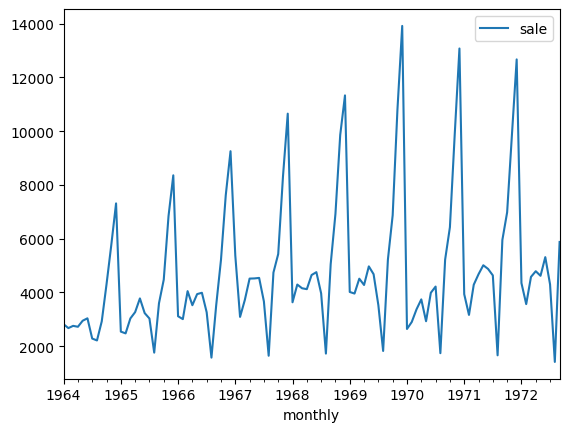

In [29]:
df.plot()

Now check for stationary or non-stationary data

In [30]:
from statsmodels.tsa.stattools import adfuller

In [20]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.8 MB 2.2 MB/s eta 0:00:05
   ----- ---------------------------------- 1.3/9.8 MB 2.4 MB/s eta 0:00:04
   ------- -------------------------------- 1.8/9.8 MB 2.6 MB/s eta 0:00:04
   ---------- ----------------------------- 2.6/9.8 MB 2.7 MB/s eta 0:00:03
   ------------ --------------------------- 3.1/9.8 MB 2.8 MB/s eta 0:00:03
   -------------- ------------------------- 3.7/9.8 MB 2.8 MB/s eta 0:00:03
   ----------------- ---------------------- 4.2/9.8 MB 2.8 MB/s eta 0:00:03
   -------------------- ------------------- 5.0/9.8 MB 2.8 MB/s eta 0:00:02
   ---------------------- ----------------- 5.5/9.8 MB 2.9 MB/s eta 0:00:02
   ------------------------ --------------- 6.0/9.8 MB 2.8 MB/s eta 0:00:02
   ------------------------- -------------- 6.3/9.8 MB 2.8 MB/s eta 0:00:02
   -----------------------

In [31]:
result= adfuller(df['sale'])

In [32]:

print("p-value :", result[1])


p-value : 0.3639157716602467


In [33]:
if(result[1]<0.05):
    print("reject null hypothesis: means data is stationary")
else:
    print("accept null hypothesis: means data is non stationary")

accept null hypothesis: means data is non stationary


data is not stationary that means it is not good for ARIMA model

we have to use some improvement to make it stationary

Differencing

In [34]:
df["sale"].shift()

monthly
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: sale, Length: 105, dtype: float64

In [35]:
df.tail()

,sale
monthly,
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0
1972-08-01,1413.0
1972-09-01,5877.0


In [36]:
df["sale first difference"]= df["sale"]-df["sale"].shift(1)

In [37]:
 df["seasonal first difference"]= df["sale"]-df["sale"].shift(12)

In [38]:
df.head(20)

,sale,sale first difference,seasonal first difference
monthly,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [39]:
result_sale= adfuller(df["sale first difference"].dropna())

In [40]:
result_ses= adfuller(df["seasonal first difference"].dropna())

2.51962044738698e-10 means: 10^-10 which is very small 0.0000000002519620

In [41]:
result_sale[1]

2.51962044738698e-10

In [42]:
result_ses[1]

2.0605796968136632e-11

But due to seasonal data it is good to use gap of 12 

<Axes: xlabel='monthly'>

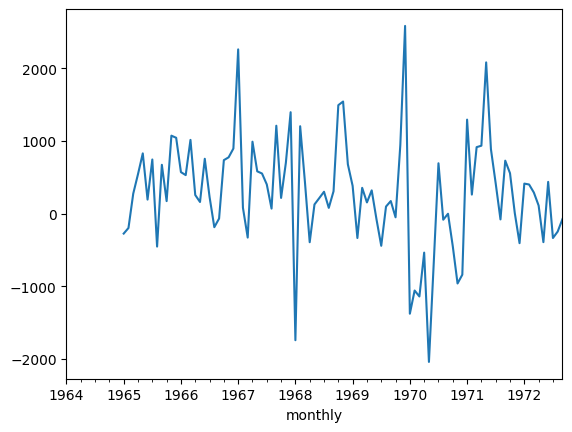

In [43]:
df["seasonal first difference"].plot()

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

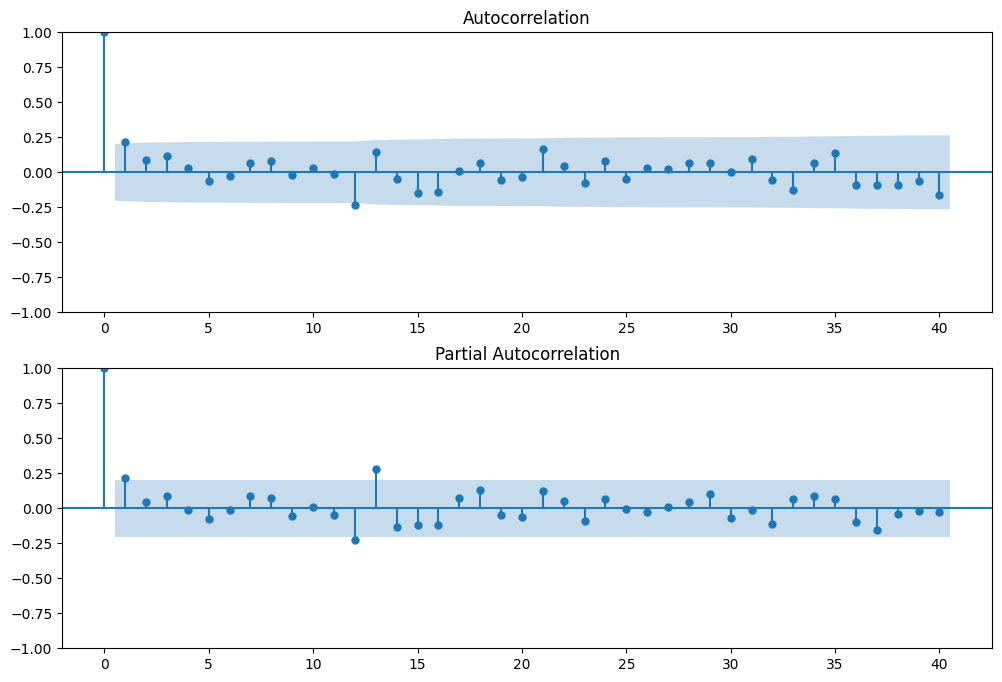

In [45]:
fig= plt.figure(figsize=(12,8))
ax1= fig.add_subplot(211)
fig= plot_acf(df["seasonal first difference"].dropna(),lags=40,ax=ax1)
ax2= fig.add_subplot(212)
fig= plot_pacf(df["seasonal first difference"].dropna(),lags=40,ax=ax2)
plt.show()

In [46]:
# for non seasonal data 
# p=1,d=1,q=0 or 1
from statsmodels.tsa.arima.model import ARIMA

In [47]:
model= ARIMA(df["sale"],order=(1,1,1))# p(PACF),diff,q(ACF)
result= model.fit()

C:\Users\nikhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nikhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nikhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Due to seasonality in our dataset ARIMA is not applicable here
;

In [48]:
import statsmodels.api as sm

In [49]:
model= sm.tsa.statespace.SARIMAX(df["sale"],order=(1,1,1), seasonal_order=(1,1,1,12))
result= model.fit()
#12-> indicates that 12 lag for sesonals

C:\Users\nikhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\nikhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='monthly'>

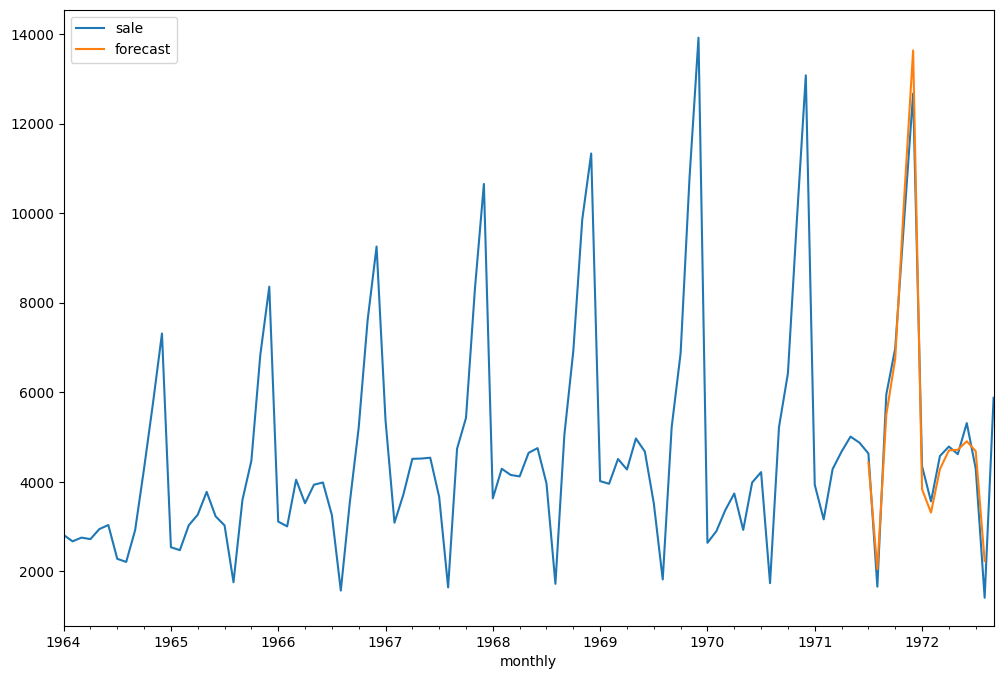

In [50]:
df["forecast"]= result.predict(start=90,end=103,dynamic=True)
# index from ... to ...
df[["sale","forecast"]].plot(figsize=(12,8))



In [59]:
actual=df["sale"].iloc[90:104]
predicted=df["forecast"].iloc[90:104]

In [64]:
actual

monthly
1971-07-01     4633.0
1971-08-01     1659.0
1971-09-01     5951.0
1971-10-01     6981.0
1971-11-01     9851.0
1971-12-01    12670.0
1972-01-01     4348.0
1972-02-01     3564.0
1972-03-01     4577.0
1972-04-01     4788.0
1972-05-01     4618.0
1972-06-01     5312.0
1972-07-01     4298.0
1972-08-01     1413.0
Name: sale, dtype: float64

In [65]:
predicted

monthly
1971-07-01     4437.325447
1971-08-01     2050.747835
1971-09-01     5493.376758
1971-10-01     6752.038711
1971-11-01    10327.297021
1971-12-01    13632.323866
1972-01-01     3832.961802
1972-02-01     3313.097205
1972-03-01     4285.476465
1972-04-01     4701.093018
1972-05-01     4717.511681
1972-06-01     4906.404435
1972-07-01     4685.437221
1972-08-01     2232.408888
Name: forecast, dtype: float64

In [61]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(actual, predicted)

397.78233369829

In [62]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(actual, predicted)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 215944.82086560942


In [63]:
import numpy as np

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 464.698634456364


In [66]:
mape = np.mean(np.abs((actual - predicted) / actual)) * 100
print(f"Mean Absolute Percentage Error: {mape}%")

Mean Absolute Percentage Error: 11.078719518456232%


In [67]:
accuracy = 100 - mape
print(f"Model Accuracy: {accuracy}%")

Model Accuracy: 88.92128048154376%


In [40]:
from pandas.tseries.offsets import DateOffset
future_dates= [df.index[-1]+DateOffset(months=x) for x in range(0,24)]

In [41]:
future_dates_df= pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [42]:
future_dates_df.tail()

,sale,sale first difference,seasonal first difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [43]:
future_df= pd.concat([df,future_dates_df])

C:\Users\nikhi\AppData\Local\Temp\ipykernel_33204\4198056567.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df= pd.concat([df,future_dates_df])


In [44]:
future_df["forecast"]= result.predict(start=104, end=120,dynamic=True)

<Axes: >

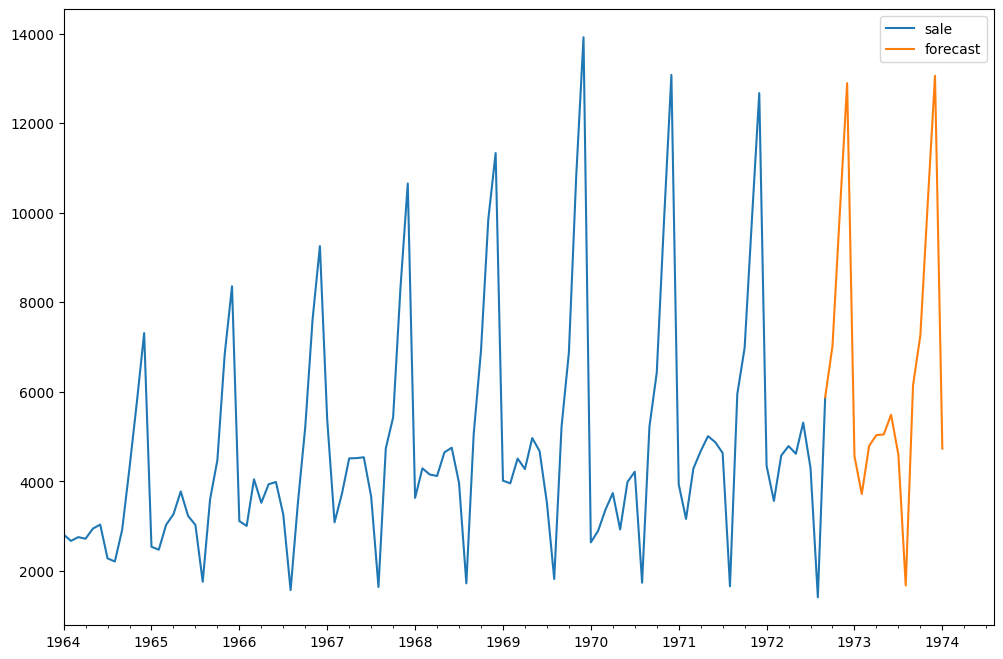

In [45]:
future_df[["sale","forecast"]].plot(figsize=(12,8))

In [46]:
##END